In [1]:
import cobra
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd 

In [2]:
cobra.__version__

'0.26.2'

In [3]:
model = cobra.io.read_sbml_model('models/e_coli/momentiJO1366.xml')
#model = cobra.io.read_sbml_model('eciML1515_batch.xml')
#model = cobra.io.read_sbml_model('ecYeastGEM.xml')

NameError: name 'cobra' is not defined

In [4]:
model.reactions.EX_glc__D_e.lower_bound = -10
#model.reactions.EX_lac__L_e.lower_bound = -10 # This was only used to check diauxie
# This is the standard value used for E. coli, see data from
# https://www.sciencedirect.com/science/article/pii/S2405471216302903?via%3Dihub


In [5]:
for r in model.exchanges:
    if r.lower_bound != 0:
        print(r, r.lower_bound)

EX_ca2_e: ca2_e <=>  -1000.0
EX_cbl1_e: cbl1_e <=>  -0.01
EX_cl_e: cl_e <=>  -1000.0
EX_co2_e: co2_e <=>  -1000.0
EX_cobalt2_e: cobalt2_e <=>  -1000.0
EX_cu2_e: cu2_e <=>  -1000.0
EX_fe2_e: fe2_e <=>  -1000.0
EX_fe3_e: fe3_e <=>  -1000.0
EX_glc__D_e: glc__D_e <=>  -10
EX_h_e: h_e <=>  -1000.0
EX_h2o_e: h2o_e <=>  -1000.0
EX_k_e: k_e <=>  -1000.0
EX_mg2_e: mg2_e <=>  -1000.0
EX_mn2_e: mn2_e <=>  -1000.0
EX_mobd_e: mobd_e <=>  -1000.0
EX_nh4_e: nh4_e <=>  -1000.0
EX_ni2_e: ni2_e <=>  -1000.0
EX_o2_e: o2_e <=>  -1000.0
EX_pi_e: pi_e <=>  -1000.0
EX_so4_e: so4_e <=>  -1000.0
EX_zn2_e: zn2_e <=>  -1000.0


In [6]:
for r in model.exchanges:
    r.upper_bound = 1000


NameError: name 'model' is not defined

# Flux variability analysis

In [47]:
dfv = cobra.flux_analysis.flux_variability_analysis(model, reaction_list = model.exchanges)

In [25]:
dfv2 = cobra.flux_analysis.flux_variability_analysis(model, reaction_list = model.exchanges, fraction_of_optimum = 0.99)

In [49]:
dfv = dfv.loc[dfv.abs().max(1) > 1e-4, :]
dfv.to_csv('dfv.csv', float_format='%.3f', sep = ";")

In [26]:
dfv2 = dfv2.loc[dfv2.abs().max(1) > 1e-4, :]
dfv2.to_csv('dfv2_iecML151_batch.csv', float_format='%.3f', sep = ";")

In [30]:
s = model.optimize()
print(model.summary())

Objective
1.0 BIOMASS_Ec_iJO1366_core_53p95M = 0.7044758867945058

Uptake
------
Metabolite     Reaction      Flux  C-Number  C-Flux
 prot_pool  ER_pool_TG_     0.095         0   0.00%
     ca2_e     EX_ca2_e  0.003667         0   0.00%
      cl_e      EX_cl_e  0.003667         0   0.00%
 cobalt2_e EX_cobalt2_e 1.761E-05         0   0.00%
     cu2_e     EX_cu2_e 0.0004995         0   0.00%
     fe2_e     EX_fe2_e   0.01131         0   0.00%
  glc__D_e  EX_glc__D_e        10         6 100.00%
       k_e       EX_k_e    0.1375         0   0.00%
     mg2_e     EX_mg2_e  0.006111         0   0.00%
     mn2_e     EX_mn2_e 0.0004868         0   0.00%
    mobd_e    EX_mobd_e 9.088E-05         0   0.00%
     nh4_e     EX_nh4_e     7.609         0   0.00%
     ni2_e     EX_ni2_e 0.0002275         0   0.00%
      o2_e      EX_o2_e     19.86         0   0.00%
      pi_e      EX_pi_e    0.6796         0   0.00%
     so4_e     EX_so4_e    0.1777         0   0.00%
     zn2_e     EX_zn2_e 0.0002402  

## Check metabolite turnover

In [65]:
solution = model.optimize()

In [98]:
total_flux_list = []
met_list = ['pyr_c', 'ac_c', 'for_c', 'etoh_c', 'ala__L_c', 'akg_c', 'gln__L_c', 'lys__L_c', 'fum_c', 'dha_c', 'acald_c', 'orot_c', 'ura_c']
for m_id in met_list:
    m = model.metabolites.get_by_id(m_id)
    total_flux = 0
    print("#### {0} #####".format(m_id))
    for r in m.reactions:
        flux_r = solution.fluxes[r.id]*r.get_coefficient(m_id)
        if flux_r > 0:
            total_flux += flux_r
    total_flux_list.append(total_flux)
pd.DataFrame([met_list, total_flux_list])

#### pyr_c #####
#### ac_c #####
#### for_c #####
#### etoh_c #####
#### ala__L_c #####
#### akg_c #####
#### gln__L_c #####
#### lys__L_c #####
#### fum_c #####
#### dha_c #####
#### acald_c #####
#### orot_c #####
#### ura_c #####


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,pyr_c,ac_c,for_c,etoh_c,ala__L_c,akg_c,gln__L_c,lys__L_c,fum_c,dha_c,acald_c,orot_c,ura_c
1,14.503162,4.858798,1.250598,0,0.708929,11.289496,1.275532,0.241749,6.038156,8.979078,1.171939,0.233037,0


In [99]:
model.metabolites.orot_c.summary()

Percent,Flux,Reaction,Definition
100.00%,0.233,DHORD2,dhor__S_c + 0.000230031515597613 prot_pool + q8_c --> orot_c + q8h2_c
Percent,Flux,Reaction,Definition
100.00%,-0.233,ORPT_TG_reverse,orot_c + 0.00309156120831178 prot_pool + prpp_c --> orot5p_c + ppi_c


In [85]:
model.metabolites.dha_c.summary(solution)

Percent,Flux,Reaction,Definition
100.00%,8.979,F6PA_TG_forward,f6p_c + 5.67753828229373e-05 prot_pool --> dha_c + g3p_c
Percent,Flux,Reaction,Definition
100.00%,-8.979,DHAPT,dha_c + pep_c + 0.000456677380424109 prot_pool --> dhap_c + pyr_c


### note to dha
The flux shown here does not represent the standard flux in glycolysis, using 
https://www.genome.jp/entry/2.7.1.121. From a brief google search I found little info about this enzyme in ecoli. The producing reaction https://www.uniprot.org/uniprotkb/P78055/entry is neither the standard flux in E. coli glycolysis, so it is tempting to assume that this one is not necesseraily functioning, at least not at such a high rate

From https://www.sciencedirect.com/science/article/pii/S2405471216302903?via%3Dihub :
__The reactions F6PA and DHAPT are known to be utilized during growth on glycerol but are not active in growth on glucose (Gutknecht et al., 2001).__


In [5]:
with model:
    model.reactions.F6PA_TG_forward.knock_out() 
    # OR KNOCK OUT GENES  b0825 or G_b3946, or 
    # DHAPT (or its genes b2415, G_b1199, G_b1200, G_b1198, G_b2416, 
    # From https://www.sciencedirect.com/science/article/pii/S2405471216302903?via%3Dihub :
    # The reactions F6PA and DHAPT are known to be utilized during growth on glycerol but are not active in growth on glucose (Gutknecht et al., 2001).
    solution_delta_F6PA_TG = model.optimize()
    print(model.metabolites.dha_c.summary(solution_delta_F6PA_TG))
    print(solution_delta_F6PA_TG.objective_value)

NameError: name 'model' is not defined

In [86]:
model.metabolites.acald_c.summary(solution)

Percent,Flux,Reaction,Definition
100.00%,1.172,THRA,0.00121915615627352 prot_pool + thr__L_c --> acald_c + gly_c
Percent,Flux,Reaction,Definition
100.00%,-1.172,ACALD_TG_forward,acald_c + coa_c + nad_c + 0.000842200717739499 prot_pool --> accoa_c + h_c + nadh_c


### Note to acald
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC277611/
Glycine is supposedly made from serine in E. coli

Another paper indicating the glycine is made from glycine, not threonine  https://microbialcellfactories.biomedcentral.com/articles/10.1186/s12934-020-01323-2

Summary of threonine aldolase here:
https://biocyc.org/gene?orgid=ECOLI&id=LTAA-MONOMER

In [95]:
with model:
    model.reactions.THRA.knock_out() 
    model.reactions.THRA2.knock_out() 
    # OR KNOCK OUT GENES  b2551 G_b0870
    solution_delta_THRA = model.optimize()
    print(model.metabolites.acald_c.summary(solution_delta_THRA))
    print(solution_delta_THRA.objective_value)

acald_c
Formula: C2H4O

Producing Reactions
-------------------
Empty DataFrame
Columns: [Percent, Flux, Reaction, Definition]
Index: []

Consuming Reactions
-------------------
Empty DataFrame
Columns: [Percent, Flux, Reaction, Definition]
Index: []
0.6564220253216607


## Check shadow prices
Initial conclusion: shadow prices seem to correspond to the range of FVA values, but not linearly. I excpect (but would need to check) that the spearman correlation between (1/shadow price) and max(FVA) of secreted metabolites is pretty good. 

In [8]:
import scipy.stats as st

In [95]:
model = cobra.io.read_sbml_model('models/e_coli/momentiJO1366.xml')
glucose_uptake = 10
model.reactions.EX_glc__D_e.lower_bound = -glucose_uptake


In [96]:
model.reactions.DHAPT.knock_out()
model.reactions.THRA.knock_out()
model.reactions.THRA2.knock_out()
model.reactions.F6PA_TG_forward.knock_out()


In [97]:
model.optimize()
print(model.summary())

Objective
1.0 BIOMASS_Ec_iJO1366_core_53p95M = 0.6436981589523805

Uptake
------
Metabolite     Reaction      Flux  C-Number  C-Flux
 prot_pool  ER_pool_TG_     0.095         0   0.00%
     ca2_e     EX_ca2_e   0.00335         0   0.00%
      cl_e      EX_cl_e   0.00335         0   0.00%
 cobalt2_e EX_cobalt2_e 1.609E-05         0   0.00%
     cu2_e     EX_cu2_e 0.0004564         0   0.00%
     fe2_e     EX_fe2_e   0.01034         0   0.00%
  glc__D_e  EX_glc__D_e        10         6 100.00%
       k_e       EX_k_e    0.1256         0   0.00%
     mg2_e     EX_mg2_e  0.005584         0   0.00%
     mn2_e     EX_mn2_e 0.0004448         0   0.00%
    mobd_e    EX_mobd_e 8.304E-05         0   0.00%
     nh4_e     EX_nh4_e     6.952         0   0.00%
     ni2_e     EX_ni2_e 0.0002079         0   0.00%
      o2_e      EX_o2_e      17.6         0   0.00%
      pi_e      EX_pi_e    0.6209         0   0.00%
     so4_e     EX_so4_e    0.1623         0   0.00%
     zn2_e     EX_zn2_e 0.0002195  

In [98]:
# Read metabolite mapping
mapping_df = pd.read_csv('id_mapping.csv')

In [99]:
# Read measurements
measurements = pd.read_csv('ecoli_measurements.csv')
#measurements.drop(columns = ["Note"], inplace = True)


In [100]:
# Update 10 h value
for i, row in measurements.iterrows():
    if np.isnan(row["10h value"]):
        measurements.loc[i, "10h value"] = row["Value"]


In [101]:
measurements


,Metabolite name,Value,Uncertainty,10h value
0,Glucose-6-phosphate,17.65,0.53,17.65
1,Fructose-6-phosphate,29.29,0.60,29.29
2,"Fructose-1,6-bisphosphate",34.21,0.72,34.21
3,Dihydroxyacetonephosphate,50.40,1.74,40.00
4,Glyceraldehyde-3-phosphate,15.04,0.24,10.00
5,2/3-phosphoglycerate,19.45,1.55,15.00
6,Phosphoenolpyruvate,20.43,0.28,5.00
7,Pyruvate,4924.00,509.00,4924.00
8,6-Phosphogluconate,0.00,0.00,0.00
9,Ribose-5-phosphate,10.29,0.22,8.00


In [102]:
name_to_met_id = mapping_df.loc[:, ["Metabolite name", "Metabolite id"]].set_index("Metabolite name").to_dict()["Metabolite id"]

In [103]:
solution = model.optimize()
shadow_prices = []
for i, row in measurements.iterrows():
    key = name_to_met_id[row["Metabolite name"]]
    try:
        keys = key.split(",")
    except:
        print(key)
        shadow_prices.append(np.nan)
        continue
    values = []
    for key in keys:
        met_id = "{0}_c".format(key.strip())
        values.append(solution.shadow_prices[met_id])
    shadow_prices.append(max(values))

    

nan
nan
nan


In [104]:
df = measurements.copy()
df["Shadow price"] = np.abs(shadow_prices)
df = df.loc[~df.isna().any(axis = 1), :]
df = df.loc[df.Value != 0, :]
df["log10(shadow price)"] = np.log10(df["Shadow price"])

df["log10(metabolite concentration)"] = np.log10(df.Value)
df["log10(10h metabolite concentration)"] = np.log10(df["10h value"])

#It doesn't make sense to check the shadow price of acetic acid since it is already produced and secreted
df.drop(index = df.index[df["Metabolite name"] == "Acetate"].values, inplace = True)

In [105]:
corrs = st.spearmanr(df["Value"], df["Shadow price"], nan_policy='propagate')
print(corrs)

SpearmanrResult(correlation=-0.3094919786096257, pvalue=0.07965967235063362)


In [106]:
corrs = st.pearsonr(df["Value"], df["Shadow price"])
print(corrs)

(-0.16964934914129853, 0.3452463791210208)


In [107]:
corrp = st.pearsonr(df["log10(metabolite concentration)"], df["log10(shadow price)"])
print(corrp[0], corrp[1])

-0.45625347253046156 0.007614044086013232


In [108]:
corrp = st.pearsonr(df["log10(10h metabolite concentration)"], df["log10(shadow price)"])
print(corrp[0], corrp[1])

-0.5540315684735984 0.0008223694765124655


In [109]:

from scipy.optimize import curve_fit
f = lambda x, a, b: a/(x+b) 
f = lambda x, a, b, c: a*np.exp(b*x)+c 

In [110]:
x = df["log10(10h metabolite concentration)"]
y = df["log10(shadow price)"]
popt,pcov = curve_fit(f,x,y,p0=[1,-1, 4])
x_arr = np.linspace(-1, 4, 100)
yfit = f(x_arr, *popt)

-0.5540315684735984 0.0008223694765124655


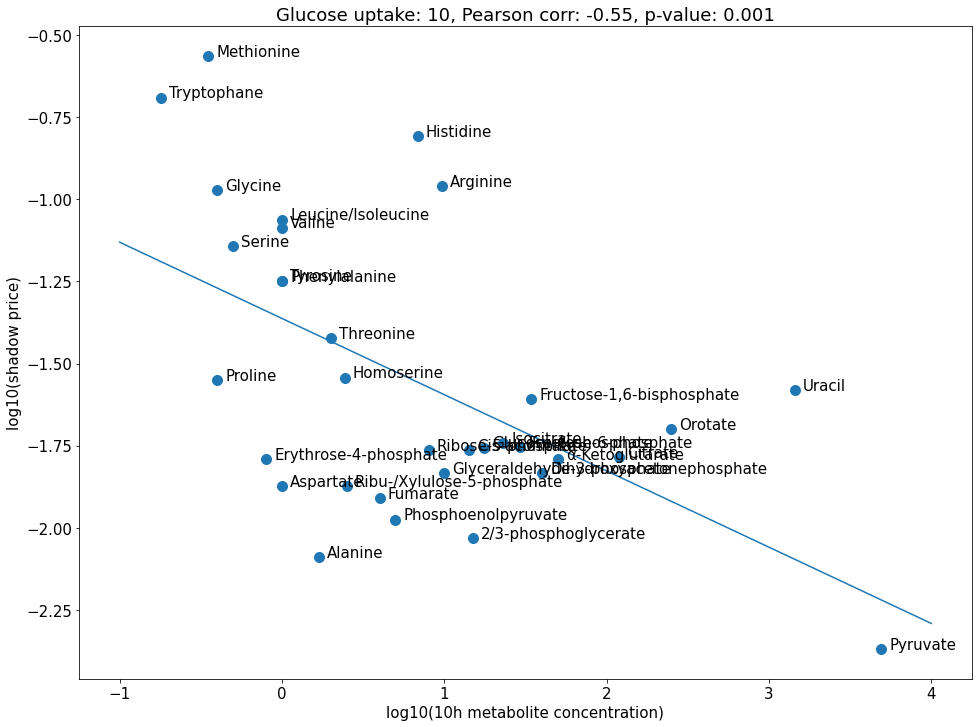

In [113]:
plt.rcParams.update({'font.size': 15})
x_param = "log10(10h metabolite concentration)"

corrp = st.pearsonr(df[x_param], df["log10(shadow price)"])
print(corrp[0], corrp[1])

ax = df.plot.scatter(x = x_param, y = "log10(shadow price)", figsize = (16, 12),
                    fontsize = 15, s = 100)
# Annotate each data point
for i, txt in enumerate(df["Metabolite name"]):
    ax.annotate(txt, (df[x_param].iat[i]+0.05, df["log10(shadow price)"].iat[i]))
plt.title("Glucose uptake: {0}, Pearson corr: {1:.2f}, p-value: {2:.3f}".format(glucose_uptake, corrp[0], corrp[1]))
  
trendline = np.polyfit(df[x_param], df["log10(shadow price)"], 1)
trendline_fun = np.poly1d(trendline)
#fun2 = lambda x: -0.7 - 0.4*x
x_arr = np.linspace(-1, 4, 100)
ax.plot(x_arr, trendline_fun(x_arr))
#ax.plot(x_arr, yfit)


ax.annotate("Pearson corr: {0:.2f}, p-value: {1:.3f}".format(corrp[0], corrp[1]), (6.4, -5.3), fontsize = 15, c = 'r')
plt.savefig("results/e_coli/met_conc_10h_vs_shadow_price_glc_{0}_reactions_KO.svg".format(glucose_uptake))
plt.savefig("results/e_coli/met_conc_10h_vs_shadow_price_glc_{0}_reactions_KO.png".format(glucose_uptake))

In [66]:
trendline

array([-0.17536362, -1.3228522 ])

In [62]:
np.linspace(-1, 4, 10)

array([-1.        , -0.44444444,  0.11111111,  0.66666667,  1.22222222,
        1.77777778,  2.33333333,  2.88888889,  3.44444444,  4.        ])

# Acetate uptake

In [2]:
model_ac = cobra.io.read_sbml_model('momentiJO1366.xml')

In [3]:
model_ac.reactions.EX_pyr_e.bounds = (0,1000)

In [ ]:
model_ac.reactions.EX_ac_e.bounds = (-1,-1)

model_ac.reactions.EX_glc__D_e.lower_bound = -5
model_ac.optimize()
print(model_ac.summary())

In [113]:
model_ac.reactions.EX_ac_e.lower_bound = -2
model_ac.reactions.EX_ac_e.upper_bound = 0

In [152]:
model_ac.reactions.EX_ac_e.bounds = (-2, 1000)
model_ac.reactions.EX_ac_e.upper_bound = 1000

r_glc_arr = np.arange(1, 20, 0.1)
N = len(r_glc_arr)
ex_ac_arr = np.zeros(N)
growth_arr = np.zeros(N)
ex_pyr_arr = np.zeros(N)

for i in range(N):
    model_ac.reactions.EX_glc__D_e.lower_bound = -r_glc_arr[i]
    s = model_ac.optimize()
    ex_ac_arr[i] = s.fluxes["EX_ac_e"]
    growth_arr[i] = s.objective_value
    ex_pyr_arr[i] = s.fluxes["EX_pyr_e"]
    

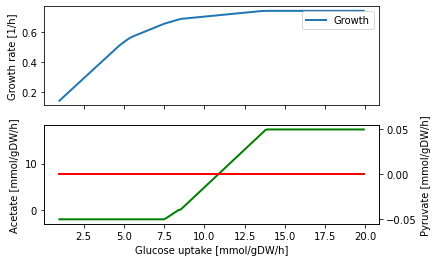

In [153]:
fig, [ax1, ax2] = plt.subplots(2,1, sharex = True)
ax3 = ax2.twinx()

ax1.plot(r_glc_arr, growth_arr, label = 'Growth', lw  = 2)
ax1.set_ylabel("Growth rate [1/h]")
ax2.plot(r_glc_arr, ex_ac_arr, label = 'Acetate', c = 'g', lw = 2)
ax2.set_ylabel("Acetate [mmol/gDW/h]")
ax2.set_xlabel("Glucose uptake [mmol/gDW/h]")
ax3.plot(r_glc_arr, ex_pyr_arr*100, label = 'Pyruvate', c = 'r', lw = 2)
ax3.set_ylabel('Pyruvate [mmol/gDW/h]')
ax1.legend()

In [99]:
range?

Init signature: range(self, /, *args, **kwargs)
Docstring:     
range(stop) -> range object
range(start, stop[, step]) -> range object

Return an object that produces a sequence of integers from start (inclusive)
to stop (exclusive) by step.  range(i, j) produces i, i+1, i+2, ..., j-1.
start defaults to 0, and stop is omitted!  range(4) produces 0, 1, 2, 3.
These are exactly the valid indices for a list of 4 elements.
When step is given, it specifies the increment (or decrement).
Type:           type
Subclasses:     


In [65]:
model_ac.optimize()
print(model_ac.summary())

Objective
1.0 BIOMASS_Ec_iJO1366_core_53p95M = 0.6806155326073196

Uptake
------
Metabolite     Reaction      Flux  C-Number C-Flux
 prot_pool  ER_pool_TG_     0.095         0  0.00%
      ac_e      EX_ac_e         1         2  3.23%
     btn_e     EX_btn_e 1.361E-06        10  0.00%
     ca2_e     EX_ca2_e  0.003543         0  0.00%
      cl_e      EX_cl_e  0.003543         0  0.00%
 cobalt2_e EX_cobalt2_e 1.702E-05         0  0.00%
     cu2_e     EX_cu2_e 0.0004826         0  0.00%
     fe2_e     EX_fe2_e   0.01093         0  0.00%
  glc__D_e  EX_glc__D_e        10         6 96.77%
       k_e       EX_k_e    0.1329         0  0.00%
     mg2_e     EX_mg2_e  0.005904         0  0.00%
     mn2_e     EX_mn2_e 0.0004703         0  0.00%
    mobd_e    EX_mobd_e  8.78E-05         0  0.00%
     nh4_e     EX_nh4_e     7.351         0  0.00%
     ni2_e     EX_ni2_e 0.0002198         0  0.00%
      o2_e      EX_o2_e     21.23         0  0.00%
      pi_e      EX_pi_e    0.6565         0  0.00%
 

## Just scrabbling


In [75]:
model.metabolites.get_by_id("3pg_")


KeyError: '3pg_e'